In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# BANK

In [3]:
data=pd.read_excel("data/Bank.xlsx")

In [4]:
data.head()

,age,marital,education,balance,housing,loan,day,month,duration_calls,campaign,subscribed
0,58,1,3,2143,1,0,5,5,261,1,0
1,44,2,2,29,1,0,5,5,151,1,0
2,33,1,2,2,1,1,5,5,76,1,0
3,47,1,4,1506,1,0,5,5,92,1,0
4,33,2,4,1,0,0,5,5,198,1,0


In [5]:
data.shape

(45211, 11)

In [6]:
data.columns

Index(['age', 'marital', 'education', 'balance', 'housing', 'loan', 'day',
       'month', 'duration_calls', 'campaign', 'subscribed'],
      dtype='object')

In [7]:
data.describe()

,age,marital,education,balance,housing,loan,day,month,duration_calls,campaign,subscribed
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1.513238,2.224813,1362.272058,0.555838,0.160226,15.806419,6.144655,258.163080,2.763841,0.116985
std,10.618762,0.692948,0.747997,3044.765829,0.496878,0.366820,8.322476,2.408034,257.527812,3.098021,0.321406
min,18.000000,1.000000,1.000000,-8019.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,1.000000,2.000000,72.000000,0.000000,0.000000,8.000000,5.000000,103.000000,1.000000,0.000000
50%,39.000000,1.000000,2.000000,448.000000,1.000000,0.000000,16.000000,6.000000,180.000000,2.000000,0.000000
75%,48.000000,2.000000,3.000000,1428.000000,1.000000,0.000000,21.000000,8.000000,319.000000,3.000000,0.000000
max,95.000000,3.000000,4.000000,102127.000000,1.000000,1.000000,31.000000,12.000000,4918.000000,63.000000,1.000000


In [8]:
X=data.iloc[:,0:10]
X.head()

,age,marital,education,balance,housing,loan,day,month,duration_calls,campaign
0,58,1,3,2143,1,0,5,5,261,1
1,44,2,2,29,1,0,5,5,151,1
2,33,1,2,2,1,1,5,5,76,1
3,47,1,4,1506,1,0,5,5,92,1
4,33,2,4,1,0,0,5,5,198,1


In [9]:
Y=data.iloc[:,10:11]
Y.head()

,subscribed
0,0
1,0
2,0
3,0
4,0


In [10]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2)

In [11]:
X_train.head()

,age,marital,education,balance,housing,loan,day,month,duration_calls,campaign
12937,52,3,2,497,0,1,7,7,277,2
20901,41,2,3,5389,0,0,13,8,209,5
20652,48,1,1,3020,0,0,12,8,645,3
38251,31,1,3,-256,1,0,15,5,272,1
29159,46,1,1,469,1,0,2,2,75,1


In [12]:
tree=DecisionTreeClassifier(max_depth=3)

In [13]:
tree.fit(X_train.values, Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
tree_score=tree.score(X_test.values, Y_test)
tree_score

0.8853256662611965

In [15]:
Y_pred=tree.predict(X_test.values)

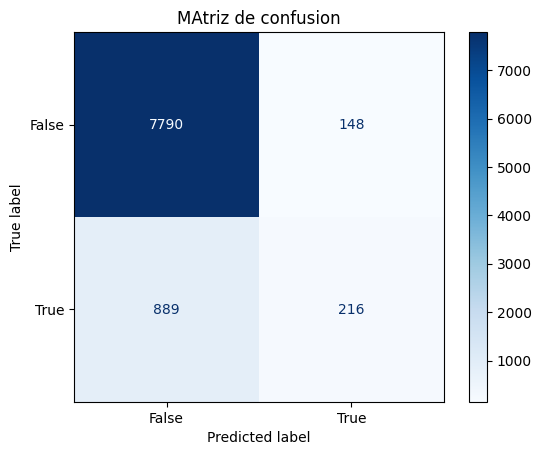

In [16]:
cm=confusion_matrix(Y_test, Y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False", "True"])
disp.plot(cmap="Blues")
plt.title("MAtriz de confusion")
plt.show()

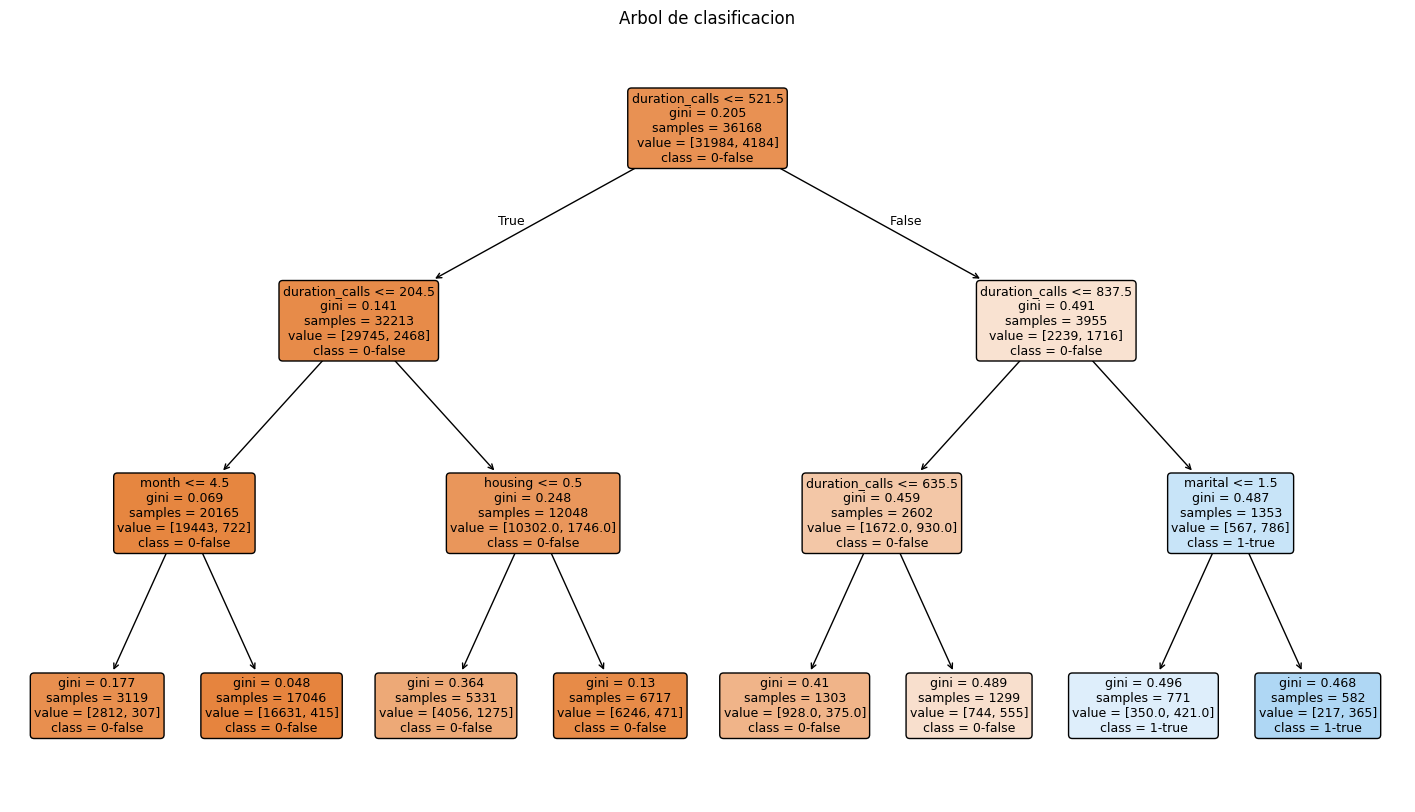

In [17]:
plt.figure(figsize=(18,10))
plot_tree(tree, feature_names=X.columns, class_names=["0-false", "1-true"],filled=True, rounded=True, fontsize=9)
plt.title("Arbol de clasificacion")
plt.show()


In [18]:
importances = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False)
importances

duration_calls    0.854485
housing           0.121662
month             0.020728
marital           0.003125
age               0.000000
education         0.000000
loan              0.000000
balance           0.000000
day               0.000000
campaign          0.000000
dtype: float64

In [19]:
age=28
marital=1
education=3
balance=2000
housing=1
loan=1
day=2
month=10
duration_calls=1000
campaign=1
new_person=[age,marital,education,balance,housing,loan,day,month,duration_calls,campaign]
pred=tree.predict([new_person])
print("Al cliente se le asigna la clase: ",pred)

Al cliente se le asigna la clase:  [1]


In [20]:
age=28
marital=1
education=3
balance=2000
housing=1
loan=1
day=2
month=10
duration_calls=400
campaign=1
new_person=[age,marital,education,balance,housing,loan,day,month,duration_calls,campaign]
pred=tree.predict([new_person])
print("Al cliente se le asigna la clase: ",pred)

Al cliente se le asigna la clase:  [0]


# Product

In [21]:
data=pd.read_excel("data/Product.xlsx")
data.head()

,age,income_k,account_balance_k,num_contacts,months_as_client,interest_level
0,25,18,5,1,6,0
1,28,20,6,1,12,0
2,30,22,7,2,18,0
3,32,24,8,2,24,0
4,35,26,9,2,30,0
